# Customer Churn Predition

## Assignment
You are provided with a sample dataset of a telecom company’s customers and it's expected to done the following tasks:

- Perform exploratory analysis and extract insights from the dataset.
- Split the dataset into train/test sets and explain your reasoning.
- Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
- Establish metrics to evaluate model performance.
- Discuss the potential issues with deploying the model into production.

## Data Exploratory Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Building up prediction model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Classifier models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read csv file
df = pd.read_csv('Data_Science_Challenge.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Check if there's missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There's no missing data.

### Data Description
| Column Name | Column Type |	Column Description |
|--------|----------------|--------|
| State |	String |	The state where a customer comes from |
| Account length |	Integer |	Number of days a customer has been using services |
| Area code |	Integer |	The area where a customer comes from |
| Phone number |	Alphanumeric |	The phone number of a customer |
| International plan |	String |	The status of customer international plan |
| Voicemail plan |	String |	The status of customer voicemail plan |
| No. vmail msgs |	Integer |	Number of voicemail message sent by a customer |
| Total day minutes |	Float |	Total call minutes spent by a customer during day time |
| Total day calls |	Integer |	Total number of calls made by a customer during day time |
| Total day charge |	Float |	Total amount charged to a customer during day time |
| Total eve minutes |	Float |	Total call minutes spent by a customer during evening time |
| Total eve calls |	Integer	| Total number of calls made by a customer during evening time |
| Total eve charge |	Float |	Total amount charged to a customer during evening time |
| Total night minutes |	Float |	Total call minutes spent by a customer during night time |
| Total night calls |	Integer	| Total number of calls made by a customer during night time |
| Total night charge |	Float	| Total amount charged to a customer during night time |
| Total intl minutes |	Float |	Total international call minutes spent by a customer
| Total intl calls |	Integer	| Total number of international calls made by a customer
| Total int charge |	Float |	Total international call amount charged to a customer
| Customer service calls |	Integer |	Total number of customer service calls made by a customer
|Churn |	Boolean |	Whether a customer is churned or not |

### Data Cleaning

In [4]:
# Check for dupliacted data
duplicate_rows = df[df.duplicated()]
duplicate_rows

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


There is no duplicate rows.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Change the values for `international plan` and `voice mail plan` to have only 1 and 0 since they only have answers either `yes` or `no`

In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Since the `state` and `area code` are the similar kinds, we will stick with `area code` to differenciate the customers' area. So we will drop `state`. Also `phone number` is insufficient with our analysis so will drop that as well. 

In [7]:
# Drop unnecessary columns
df.drop(columns=['phone number', 'state'], inplace=True)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
df['area code'].unique()

array([415, 408, 510])

Since `area code` only has 3 values and it should be used to represent an area, we wil treat this as an object. We will use one-hot encoder to convert it. 

In [9]:
df['area code'] = df['area code'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   object 
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [10]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
df.shape

(3333, 19)

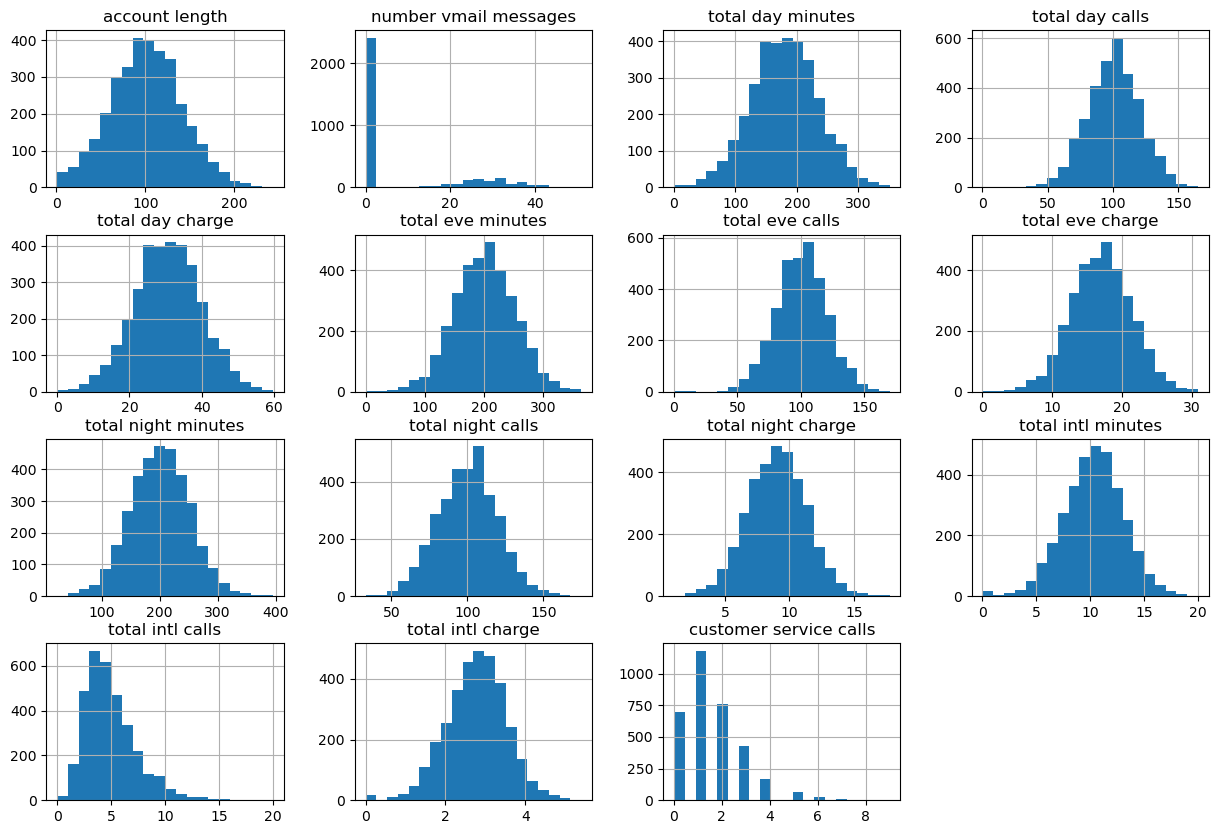

In [12]:
df.hist(figsize=(15,10), bins=20)
plt.show()

### Set features and target

In [13]:
# Get the features column names except the churn
features = df.drop(columns=['churn']).columns.tolist()

In [14]:
# Set churn to our target variable
target = 'churn'

In [15]:
# Get the X and y
X = df[features]
y = df[target]

In [16]:
y.value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

### 1. Insights from explanatory analysis

- There are total 3333 rows with 19 features
- Most of the customers don't use voice mail messages
- Mean of the total charge was the highest during the day (30.562307) compared to evening (17.083540) and night (9.039325).
- The distribution for total calls made by the customer have similar distribution across day, evening and night.
- International call was the lowest compared to the day, evening and night calls.
- Customer service calls are skewed to the right with most of the calls made were only 1-2 times.
- This is an imbalanced dataset. The number of churn `false` is 2850 whereas `true` is only 483. We will stratify when spliting it into train and test sets.

## Split to Train and Test Set 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 2. Split the dataset into train/test sets and explain your reasoning
- Set the test size to 20% since that is the largely accepted standard. 
- Stratify by `y` since the dataset is imbalanced so that we don't have either train or test set to be imbalanaced. 

## Preprocessing

For preprocessing, we will split into numerical variables and categorical variables for standarization. 

In [18]:
# Get each numerical and categorical feature names as a list 
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [19]:
# Create each numerical and categorical transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
# Combine the above transformer in a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ] 
)

## 3. Create Classifier Models Pipeline

We will now find the best classfier for this dataset. I have choose `Random Forest Classifier`, `Naive Bayes`, `Logistics Regression`, `Decision Tree Classifier`, `Support Vector Machine` and `K-Neighbors classifier`. The reason for choosing these is because,
- they are well-established supervised learning model,
- able to handle both numerical and categorical variables,
- diverse in terms of learning strategies (e.g., tree-based, distance-based, probabilistic, margin-based), allowing for a broad comparison.


In [21]:
# Create a pipeline with the steps of preprocessing and fitting into the classifiers
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Classifiers and the parameter grids
param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    },

    {
        'classifier': [GaussianNB()],
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },

    {
        'classifier': [LogisticRegression(random_state=42)],
        'classifier__tol': [1e-2, 1e-4, 1e-6],
        'classifier__C': [1, 5, 10],
        
    },

    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__max_depth': [3, 5, 7, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10, 15],
        'classifier__min_samples_leaf': [1, 3, 5, 7]
    },

    {
        'classifier': [SVC(random_state=42)],
        'classifier__C': [0.01, 1, 10, 100]
    },

    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 10]
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [22]:
# Fit the models and find the best model and params
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 127 candidates, totalling 635 fits
[CV] END classifier=RandomForestClassifier(random_state=42), classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier=RandomForestClassifier(random_state=42), classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier=RandomForestClassifier(random_state=42), classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier=RandomForestClassifier(random_state=42), classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier=RandomForestClassifier(random_state=42), classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier=RandomForestClassifier(random_state=42), classifier__max_depth=None

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'cha...
                         {'classifier': [DecisionTreeClassifier(random_state=42)],
                          'classifier__max_depth': [3, 5, 7, 10, 20, None],
                          'classifier__min_samples_leaf': [1, 3, 5, 7],
                          'classifier__min_samples_split': [2, 5, 10, 15]},
                         {'classifier': [SVC(random_state=42)],
                          'classifier__C': [0.01, 1, 10, 100]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 10]}],
             scoring='accuracy', verbose=2)

In [23]:
print(f"Best score: {model.best_score_:.2f}")
print(f"Best classifier and parameters: \n{model.best_params_}")

Best score: 0.96
Best classifier and parameters: 
{'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [24]:
results_df = pd.DataFrame(model.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score,std_test_score
9,{'classifier': RandomForestClassifier(random_s...,0.955360,0.005511
1,{'classifier': RandomForestClassifier(random_s...,0.954235,0.006477
8,{'classifier': RandomForestClassifier(random_s...,0.951984,0.006797
0,{'classifier': RandomForestClassifier(random_s...,0.951983,0.007202
3,{'classifier': RandomForestClassifier(random_s...,0.951234,0.006733
...,...,...,...
18,{'classifier': LogisticRegression(random_state...,0.860468,0.004125
14,"{'classifier': GaussianNB(), 'classifier__var_...",0.860465,0.004199
13,"{'classifier': GaussianNB(), 'classifier__var_...",0.860465,0.004199
12,"{'classifier': GaussianNB(), 'classifier__var_...",0.860465,0.004199


The best classifier is `Random Forest Classifier` with the best parameters of `max_depth = 20`, `min_sample_split = 5` and `n_estimators = 100`

### 4. Model performance

In [25]:
# Establish metrics to evaluate model performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       570
        True       0.92      0.69      0.79        97

    accuracy                           0.95       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.95      0.94       667



## Confusion Matrix

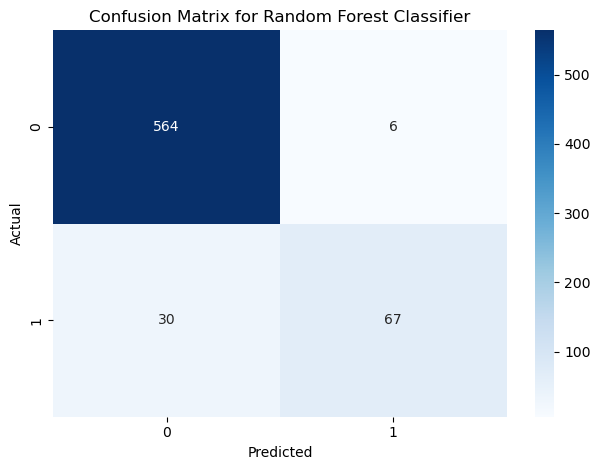

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Feature Importance

In [27]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

array(['area code_408', 'area code_415', 'area code_510',
       'international plan_no', 'international plan_yes',
       'voice mail plan_no', 'voice mail plan_yes'], dtype=object)

In [28]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

# Combine the numerical and one-hot encoded categorical feature names
feature_names = numerical_features + list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

In [29]:
feature_names

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'area code_408',
 'area code_415',
 'area code_510',
 'international plan_no',
 'international plan_yes',
 'voice mail plan_no',
 'voice mail plan_yes']

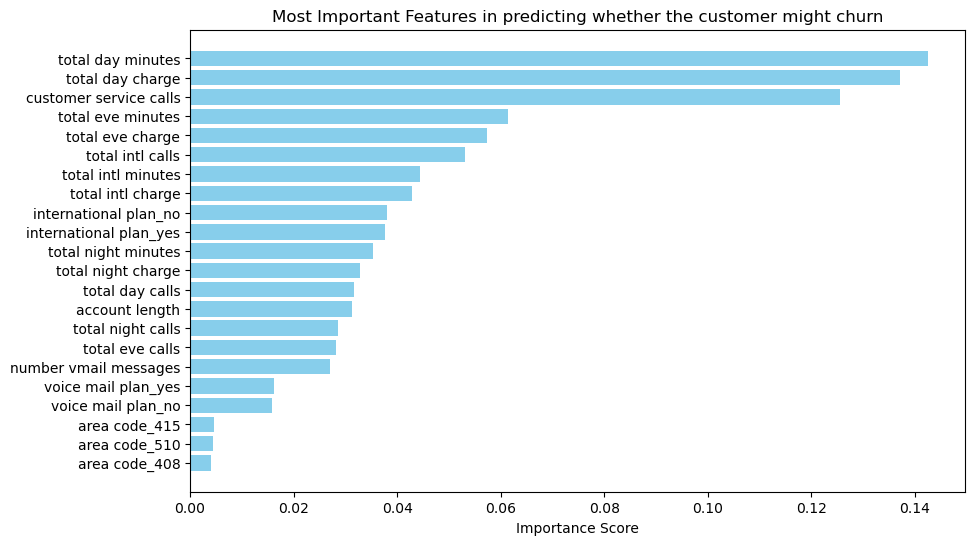


Test set accuracy: 94.60%


In [30]:
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting whether the customer might churn')
plt.xlabel('Importance Score')
plt.show()

# Print test score 
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

## 5. Deployment Issue

There could be several deployment issues with the model. 

1. Data Drift
- Over time, the behaviour of the customers may change, so we have to keep monitor the customer data and update the dataset to the very recent one.

2. Model Staleness
- The model is trained on historical data. As the business or customer base evolves, older patterns may no longer apply. To solve this we should establish a regular retraining schedule with updated data.

3. Data Privacy and Compliance
- Customer data could often be sensitive. We should ensure the model and data pipeline comply with GDPR, CCPA and company policies.  